# Advanced Analysis: Climate, Air Quality, and Spatial Patterns
**Developer**: Jinwoo Oh

---

**Product Manager Accelerator**

The Product Manager Accelerator Program is designed to support PM professionals through every stage of their careers. From students looking for entry-level jobs to Directors looking to take on a leadership role, our program has helped over hundreds of students fulfill their career aspirations. Our Product Manager Accelerator community are ambitious and committed. Through our program they have learnt, honed and developed new PM and leadership skills, giving them a strong foundation for their future endeavors.

Website: https://www.pmaccelerator.io/ | LinkedIn: https://www.linkedin.com/school/pmaccelerator/

## Table of Contents

1. [Imports & Setup](#1.-Imports-&-Setup)
2. [Load Data & Add Continent](#2.-Load-Data-&-Add-Continent)
3. [Climate Analysis](#3.-Climate-Analysis)
    - 3.1 Long-term Temperature Trends by Continent
    - 3.2 Seasonal Patterns: Northern vs Southern Hemisphere
    - 3.3 Temperature Variability by Country
4. [Environmental Impact (Air Quality)](#4.-Environmental-Impact-(Air-Quality))
    - 4.1 Correlation: Air Quality vs Weather
    - 4.2 PM2.5 and PM10 by Weather Condition
    - 4.3 PM2.5 Scatter Plots
5. [Spatial Analysis (Interactive Maps)](#5.-Spatial-Analysis-(Interactive-Maps))
    - 5.1 World Map: Average Temperature by City
    - 5.2 World Map: Average PM2.5 by City
6. [Geographical Patterns](#6.-Geographical-Patterns)
    - 6.1 Temperature Distribution by Continent
    - 6.2 Latitude vs Temperature
    - 6.3 Weather Conditions by Continent
7. [Conclusions](#7.-Conclusions)

## 1. Imports & Setup

Import all libraries needed for climate analysis, air quality exploration, interactive mapping, and geographical pattern visualization.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import warnings
import os

# Configuration
warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option('display.max_columns', None)

# Ensure output directories exist
os.makedirs('../outputs/figures', exist_ok=True)
os.makedirs('../outputs', exist_ok=True)

print('Setup complete.')

Setup complete.


## 2. Load Data & Add Continent

I load the cleaned dataset and map each country to its continent using a manually defined dictionary. This enables continent-level analysis throughout the notebook.

In [72]:
# Load cleaned data
df = pd.read_csv('../data/cleaned_weather.csv')
df['last_updated'] = pd.to_datetime(df['last_updated'])
print(f'Dataset shape: {df.shape}')
print(f'Date range: {df["last_updated"].min()} to {df["last_updated"].max()}')

# Continent mapping (from CLAUDE.md)
continent_map = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa',
    'Andorra': 'Europe', 'Angola': 'Africa', 'Argentina': 'South America',
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe',
    'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Belarus': 'Europe', 'Belgium': 'Europe', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia And Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Brunei': 'Asia',
    'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa',
    'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Congo': 'Africa', 'Costa Rica': 'North America',
    'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Dominican Republic': 'North America',
    'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
    'Estonia': 'Europe', 'Ethiopia': 'Africa', 'Finland': 'Europe',
    'France': 'Europe', 'Gabon': 'Africa', 'Georgia': 'Asia',
    'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Guatemala': 'North America', 'Haiti': 'North America', 'Honduras': 'North America',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia',
    'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kuwait': 'Asia',
    'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia',
    'Libya': 'Africa', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malaysia': 'Asia', 'Mali': 'Africa',
    'Malta': 'Europe', 'Mexico': 'North America', 'Moldova': 'Europe',
    'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Morocco': 'Africa',
    'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nicaragua': 'North America',
    'Niger': 'Africa', 'Nigeria': 'Africa', 'North Korea': 'Asia',
    'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia',
    'Pakistan': 'Asia', 'Panama': 'North America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia',
    'Senegal': 'Africa', 'Serbia': 'Europe', 'Singapore': 'Asia',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Somalia': 'Africa',
    'South Africa': 'Africa', 'South Korea': 'Asia', 'Spain': 'Europe',
    'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan': 'Asia',
    'Tanzania': 'Africa', 'Thailand': 'Asia', 'Tunisia': 'Africa',
    'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe',
    'United States of America': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Venezuela': 'South America', 'Vietnam': 'Asia',
    'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',
}

# Add continent column
df['continent'] = df['country'].map(continent_map).fillna('Other')

print(f'\nContinent distribution:')
print(df['continent'].value_counts())

# Check for unmapped countries
other_countries = df[df['continent'] == 'Other']['country'].unique()
print(f'\nCountries mapped to "Other": {len(other_countries)}')
if len(other_countries) > 0:
    print(list(other_countries))

print(f'\nShape after adding continent: {df.shape}')

Dataset shape: (124721, 34)
Date range: 2024-05-16 01:45:00 to 2026-02-17 19:45:00

Continent distribution:
continent
Other            34727
Asia             27940
Europe           25821
Africa           20308
North America     8265
South America     6378
Oceania           1282
Name: count, dtype: int64

Countries mapped to "Other": 78
['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Bosnia and Herzegovina', 'Brunei Darussalam', 'Cape Verde', 'Central African Republic', 'Comoros', 'Democratic Republic of Congo', 'Djibouti', 'Dominica', 'Equatorial Guinea', 'Eritrea', 'Swaziland', 'Fiji Islands', 'Gambia', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Vatican City', 'Kiribati', 'Kyrghyzstan', 'Lesotho', 'Liberia', 'Liechtenstein', 'Malawi', 'Maldives', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Micronesia', 'Monaco', 'Namibia', 'Macedonia', 'Palau', 'Papua New Guinea', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Se

## 3. Climate Analysis

This section examines long-term temperature patterns across continents, compares seasonal cycles between hemispheres, and identifies countries with the most extreme temperature variability.

### 3.1 Long-term Temperature Trends by Continent

I aggregate temperature data by continent and month to reveal how each continent's average temperature changes over time. This shows seasonal cycles and the relative warmth of each region.

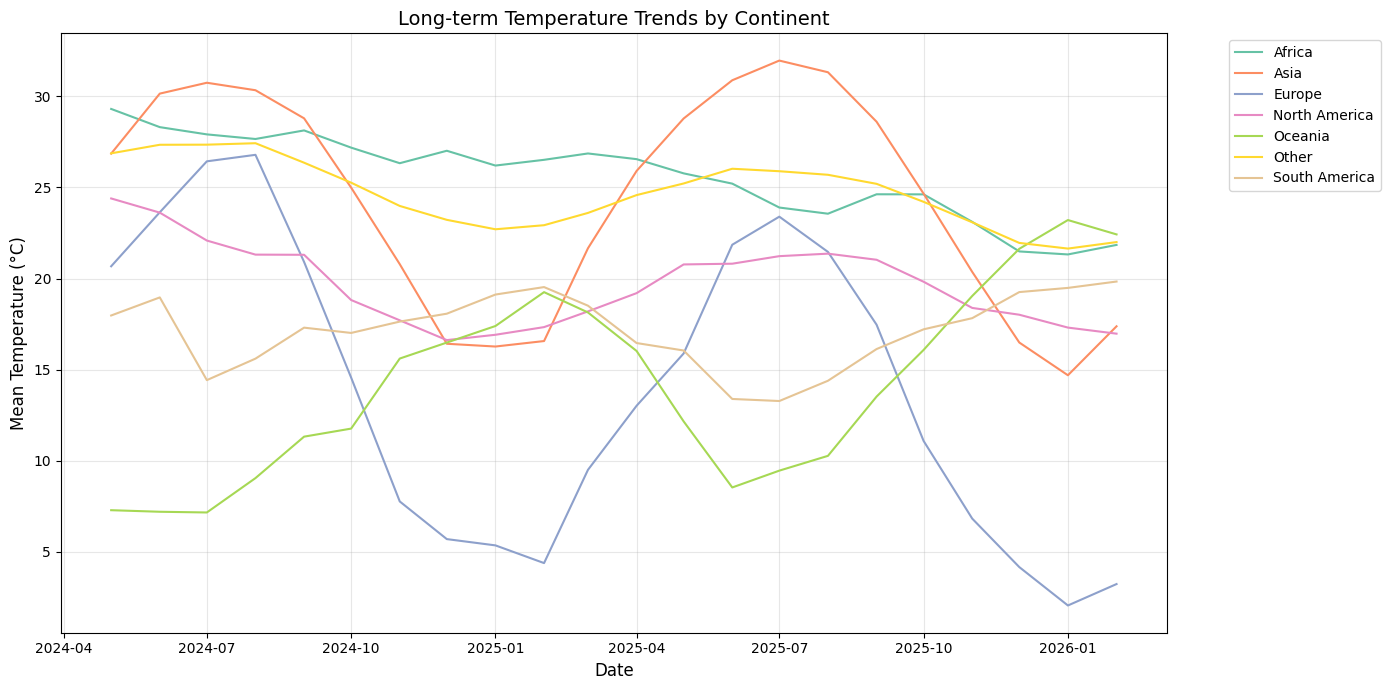

In [73]:
# Monthly mean temperature by continent
df['year_month'] = df['last_updated'].dt.to_period('M')
continent_monthly = df.groupby(['continent', 'year_month'])['temperature_celsius'].mean().reset_index()
continent_monthly['date'] = continent_monthly['year_month'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 7))
palette = sns.color_palette('Set2', df['continent'].nunique())
for i, continent in enumerate(sorted(continent_monthly['continent'].unique())):
    data = continent_monthly[continent_monthly['continent'] == continent]
    ax.plot(data['date'], data['temperature_celsius'], label=continent,
            linewidth=1.5, color=palette[i])

ax.set_title('Long-term Temperature Trends by Continent', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Mean Temperature (\u00b0C)', fontsize=12)
ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/climate_continent_trends.png', dpi=150, bbox_inches='tight')
plt.show()

The monthly temperature trends reveal clear seasonal cycles in Northern Hemisphere continents. Africa maintains consistently high temperatures year-round due to its tropical and subtropical location. Europe, Asia, and North America show strong seasonal swings between summer and winter. Southern Hemisphere continents (South America, Oceania) display milder fluctuations. The Southern Hemisphere overall appears much flatter because it is roughly 80% ocean, and water changes temperature far more slowly than land.

### 3.2 Seasonal Patterns: Northern vs Southern Hemisphere

I group continents into Northern Hemisphere (North America, Europe, Asia) and Southern Hemisphere (South America, Africa, Oceania) to compare their average seasonal temperature cycles.

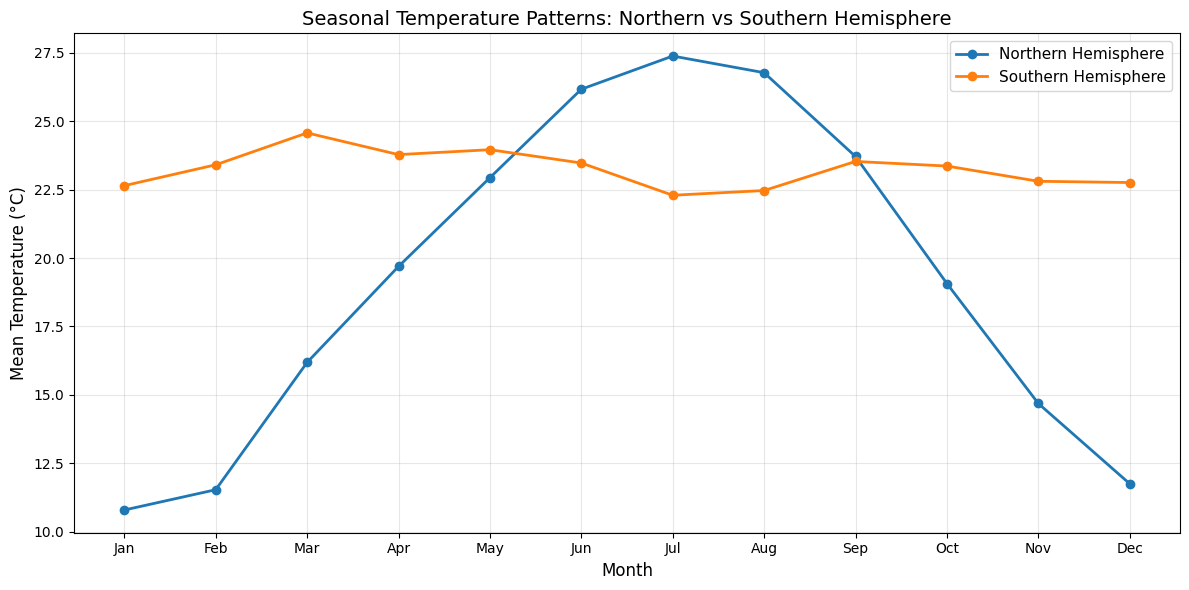

In [74]:
# Define hemisphere mapping
hemisphere_map = {
    'North America': 'Northern',
    'Europe': 'Northern',
    'Asia': 'Northern',
    'South America': 'Southern',
    'Africa': 'Southern',
    'Oceania': 'Southern'
}
df['hemisphere'] = df['continent'].map(hemisphere_map).fillna('Other')

# Average temperature by hemisphere and month (across all years)
df['month_num'] = df['last_updated'].dt.month
hemisphere_monthly = df[df['hemisphere'] != 'Other'].groupby(
    ['hemisphere', 'month_num']
)['temperature_celsius'].mean().reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(12, 6))
for hemisphere in ['Northern', 'Southern']:
    data = hemisphere_monthly[hemisphere_monthly['hemisphere'] == hemisphere]
    ax.plot(data['month_num'], data['temperature_celsius'],
            label=f'{hemisphere} Hemisphere', linewidth=2, marker='o')

ax.set_title('Seasonal Temperature Patterns: Northern vs Southern Hemisphere', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Mean Temperature (\u00b0C)', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/figures/climate_hemisphere.png', dpi=150, bbox_inches='tight')
plt.show()

The Northern Hemisphere shows a strong seasonal temperature swing, peaking in July and dropping sharply in January. The Southern Hemisphere curve is much flatter. This is primarily because the Southern Hemisphere is roughly 80% ocean, and water absorbs and releases heat much more slowly than land, acting as a temperature buffer. The Northern Hemisphere has far more continental land mass, which heats up and cools down rapidly, producing wider seasonal extremes.

### 3.3 Temperature Variability by Country

I compute the standard deviation of temperature for each country to identify which countries experience the most extreme temperature swings across the dataset.

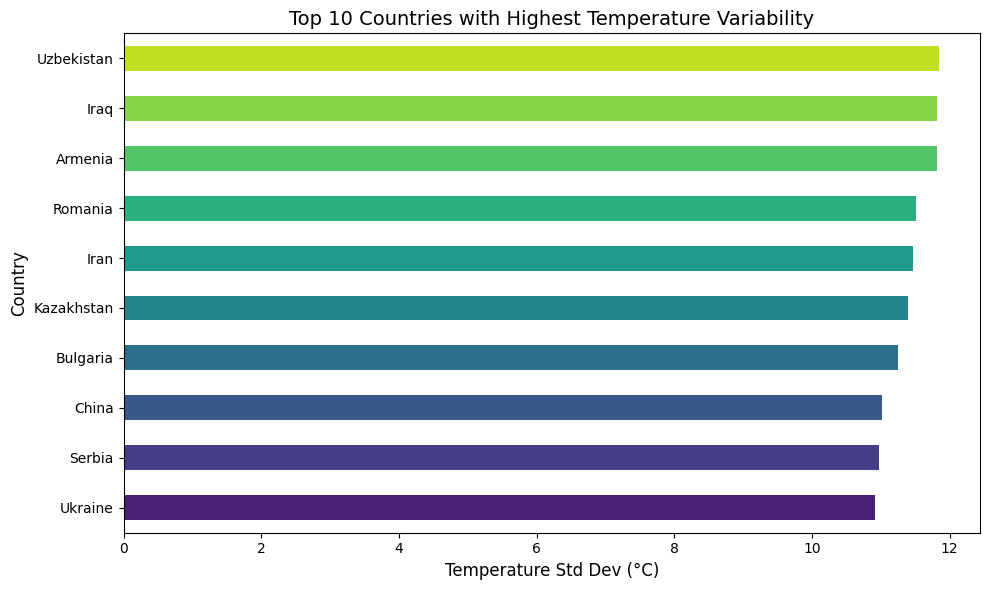

Top 10 most variable countries:
  Ukraine: 10.92°C
  Serbia: 10.97°C
  China: 11.01°C
  Bulgaria: 11.24°C
  Kazakhstan: 11.39°C
  Iran: 11.47°C
  Romania: 11.51°C
  Armenia: 11.82°C
  Iraq: 11.82°C
  Uzbekistan: 11.85°C


In [75]:
# Temperature standard deviation by country
country_variability = df[df['continent'] != 'Other'].groupby('country')['temperature_celsius'].std().dropna().sort_values(ascending=True)
top_10_variable = country_variability.tail(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_10_variable.plot(kind='barh', color=sns.color_palette('viridis', 10), ax=ax)
ax.set_title('Top 10 Countries with Highest Temperature Variability', fontsize=14)
ax.set_xlabel('Temperature Std Dev (\u00b0C)', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/figures/climate_variability.png', dpi=150, bbox_inches='tight')
plt.show()

print('Top 10 most variable countries:')
for country, std in top_10_variable.items():
    print(f'  {country}: {std:.2f}\u00b0C')

Countries with the highest temperature variability tend to be located in continental interiors at mid-to-high latitudes. These locations experience large differences between hot summers and cold winters. Countries near the equator or with significant oceanic influence typically show lower variability because the ocean moderates temperature extremes throughout the year.

## 4. Environmental Impact (Air Quality)

This section investigates the relationship between weather conditions and air quality, focusing on how temperature, humidity, wind, and precipitation correlate with pollutant concentrations.

### 4.1 Correlation: Air Quality vs Weather

I compute the correlation matrix between the six air quality pollutant columns and four key weather variables to identify which weather factors are most associated with pollution levels.

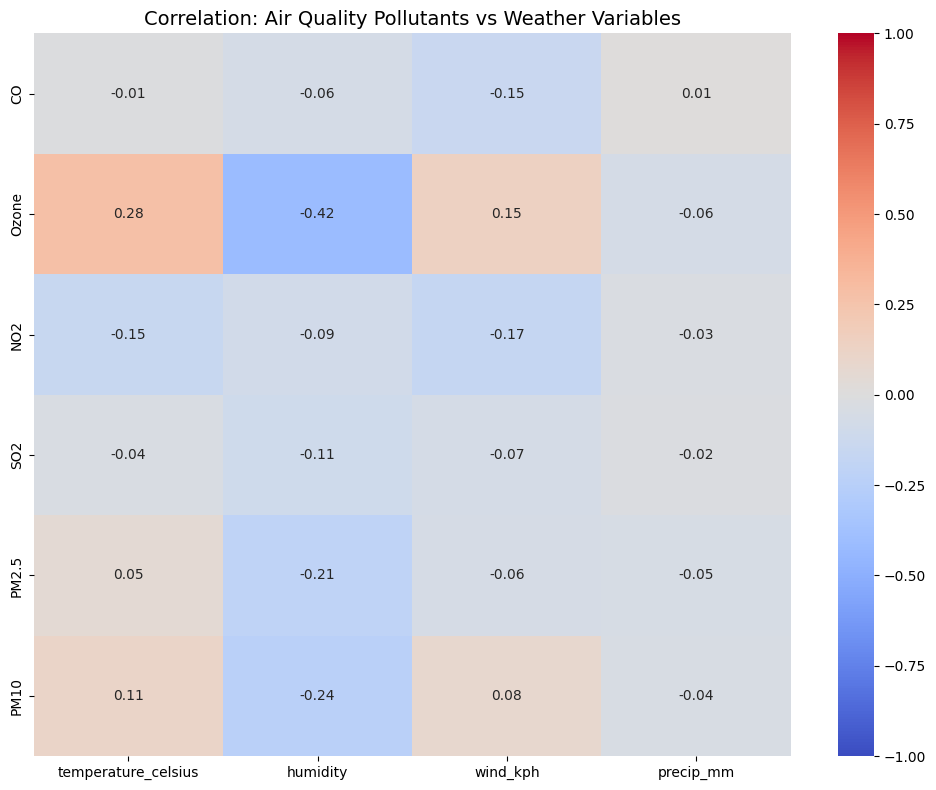

In [76]:
# Air quality columns (bracket notation required for PM2.5)
aq_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone',
           'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
           'air_quality_PM2.5', 'air_quality_PM10']
weather_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']

# Compute correlation between air quality and weather variables
corr_matrix = df[aq_cols + weather_cols].corr().loc[aq_cols, weather_cols]

# Shorten row names for display
display_names = {
    'air_quality_Carbon_Monoxide': 'CO',
    'air_quality_Ozone': 'Ozone',
    'air_quality_Nitrogen_dioxide': 'NO2',
    'air_quality_Sulphur_dioxide': 'SO2',
    'air_quality_PM2.5': 'PM2.5',
    'air_quality_PM10': 'PM10'
}
corr_display = corr_matrix.rename(index=display_names)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_display, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation: Air Quality Pollutants vs Weather Variables', fontsize=14)
plt.tight_layout()
plt.savefig('../outputs/figures/airquality_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

The correlation heatmap shows that humidity is the most influential weather variable for air quality. Ozone has a strong negative correlation with humidity (-0.42), meaning drier conditions favor ozone formation. PM2.5 and PM10 also decrease with higher humidity (-0.21 and -0.24), likely because moisture helps remove particulates from the air. Temperature has a moderate positive correlation with ozone (0.28), while wind and precipitation show weaker effects across most pollutants.

### 4.2 PM2.5 and PM10 by Weather Condition

I examine how particulate matter concentrations differ across the most common weather conditions. This helps identify whether certain weather types are associated with higher or lower pollution levels.

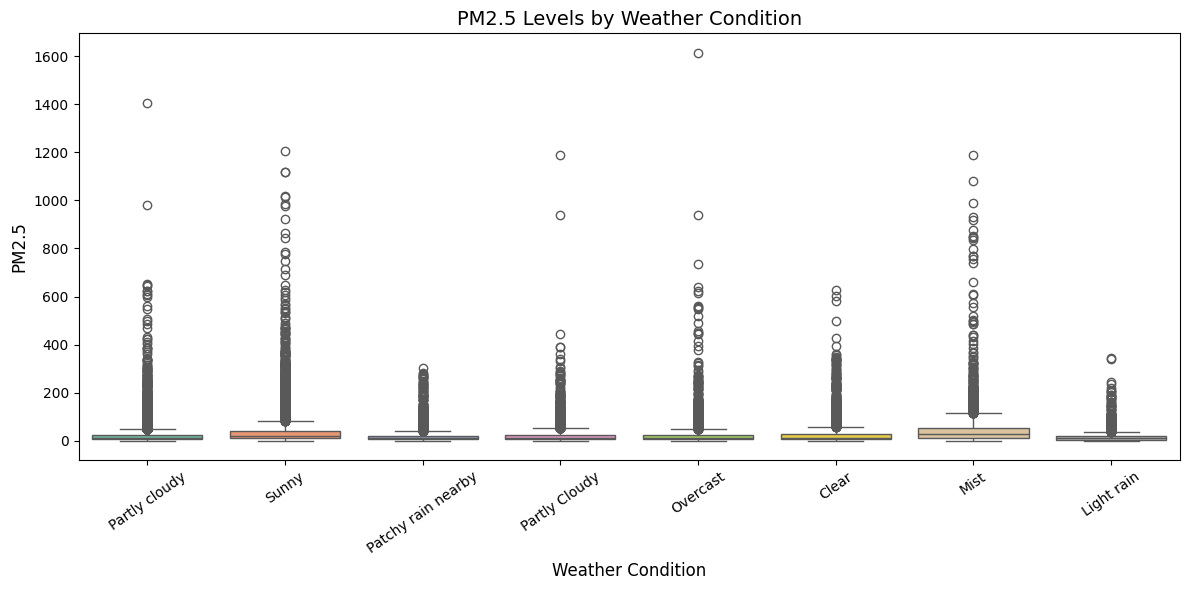

In [77]:
# Top 8 most common weather conditions
top_8_conditions = df['condition_text'].value_counts().head(8).index.tolist()
plot_df = df[df['condition_text'].isin(top_8_conditions)]

# PM2.5 boxplot by weather condition
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=plot_df, x='condition_text', y='air_quality_PM2.5',
            order=top_8_conditions, palette='Set2', ax=ax)
ax.set_title('PM2.5 Levels by Weather Condition', fontsize=14)
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('PM2.5', fontsize=12)
ax.tick_params(axis='x', rotation=35)
plt.tight_layout()
plt.savefig('../outputs/figures/pm25_by_condition.png', dpi=150, bbox_inches='tight')
plt.show()

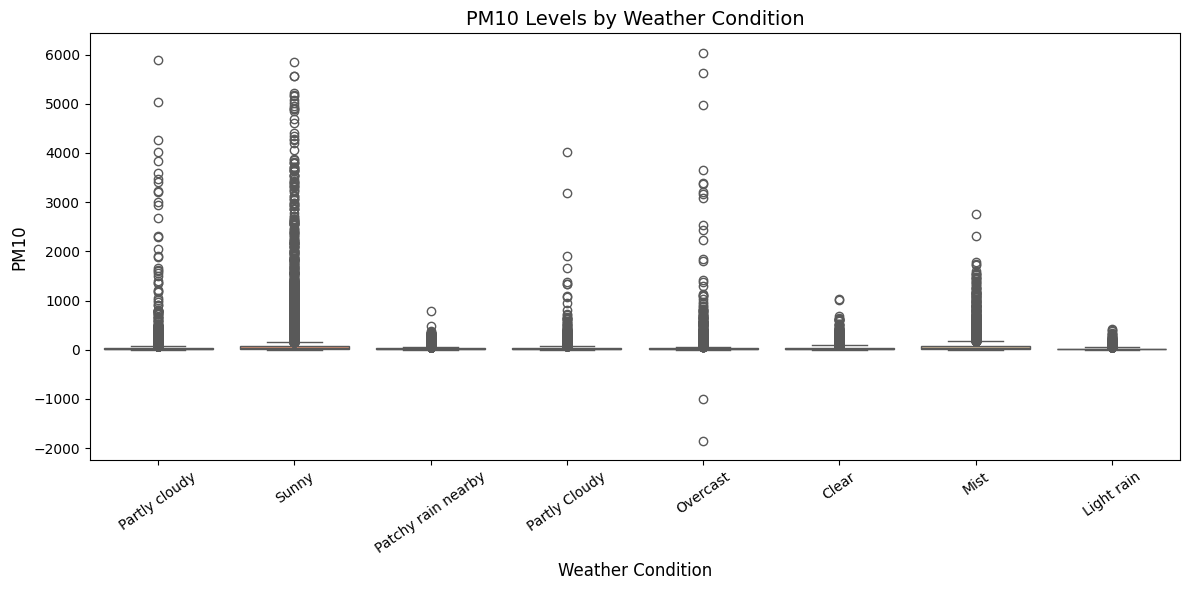

In [78]:
# PM10 boxplot by weather condition
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=plot_df, x='condition_text', y='air_quality_PM10',
            order=top_8_conditions, palette='Set2', ax=ax)
ax.set_title('PM10 Levels by Weather Condition', fontsize=14)
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('PM10', fontsize=12)
ax.tick_params(axis='x', rotation=35)
plt.tight_layout()
plt.savefig('../outputs/figures/pm10_by_condition.png', dpi=150, bbox_inches='tight')
plt.show()

The boxplots show that particulate matter levels (both PM2.5 and PM10) vary across weather conditions. Clear and sunny conditions may show higher PM levels in some regions due to the lack of rainfall to wash pollutants away. Rainy conditions (light rain, moderate rain) tend to show lower particulate levels because precipitation removes aerosols from the atmosphere. Hazy or misty conditions can also indicate high particulate concentrations, as the particles themselves reduce visibility.

### 4.3 PM2.5 Scatter Plots

I create scatter plots to visualize the relationship between PM2.5 and three key weather variables: temperature, humidity, and wind speed. With over 124,000 data points, I use low alpha transparency to reveal density patterns.

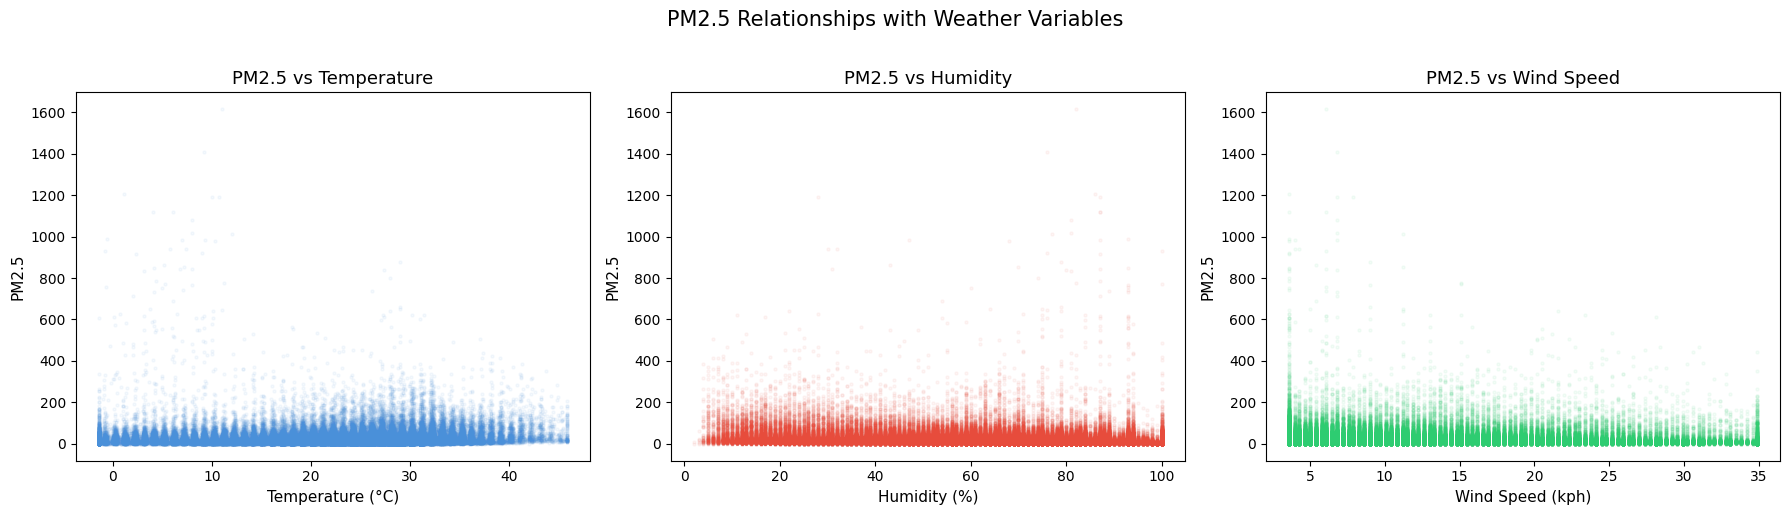

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PM2.5 vs Temperature
axes[0].scatter(df['temperature_celsius'], df['air_quality_PM2.5'],
                alpha=0.05, s=5, color='#4A90D9')
axes[0].set_title('PM2.5 vs Temperature', fontsize=13)
axes[0].set_xlabel('Temperature (\u00b0C)', fontsize=11)
axes[0].set_ylabel('PM2.5', fontsize=11)

# PM2.5 vs Humidity
axes[1].scatter(df['humidity'], df['air_quality_PM2.5'],
                alpha=0.05, s=5, color='#E74C3C')
axes[1].set_title('PM2.5 vs Humidity', fontsize=13)
axes[1].set_xlabel('Humidity (%)', fontsize=11)
axes[1].set_ylabel('PM2.5', fontsize=11)

# PM2.5 vs Wind Speed
axes[2].scatter(df['wind_kph'], df['air_quality_PM2.5'],
                alpha=0.05, s=5, color='#2ECC71')
axes[2].set_title('PM2.5 vs Wind Speed', fontsize=13)
axes[2].set_xlabel('Wind Speed (kph)', fontsize=11)
axes[2].set_ylabel('PM2.5', fontsize=11)

plt.suptitle('PM2.5 Relationships with Weather Variables', fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/pm25_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

From the scatter plots:
- **PM2.5 vs Temperature**: No strong linear pattern. PM2.5 is spread across all temperature ranges, though some clustering appears in the 15-30 C range where many tropical megacities fall.
- **PM2.5 vs Humidity**: The strongest visual pattern of the three. The highest PM2.5 readings cluster at low humidity, consistent with dusty arid conditions in Middle Eastern and North African cities. As humidity increases, extreme PM2.5 values become less common.
- **PM2.5 vs Wind Speed**: Weaker than expected. The correlation is only -0.06, meaning wind alone is not a reliable predictor of PM2.5 at the global scale.

## 5. Spatial Analysis (Interactive Maps)

I create interactive world maps using Folium to visualize the geographical distribution of temperature and air quality across cities worldwide. These maps are saved as HTML files for interactive exploration.

### 5.1 World Map: Average Temperature by City

Each city is shown as a circle marker colored by its average temperature: red for hot (>25 C), orange for moderate (15-25 C), and blue for cold (<15 C).

In [80]:
# Aggregate mean temperature per city
city_temp = df.groupby('location_name').agg({
    'temperature_celsius': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()


def temp_color(temp):
    """Assign color based on average temperature."""
    if temp > 25:
        return 'red'
    elif temp > 15:
        return 'orange'
    else:
        return 'blue'


# Create folium map
temp_map = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

for _, row in city_temp.iterrows():
    color = temp_color(row['temperature_celsius'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['location_name']}: {row['temperature_celsius']:.1f}\u00b0C"
    ).add_to(temp_map)

temp_map.save('../outputs/temperature_map.html')
print('Temperature map saved to ../outputs/temperature_map.html')
print(f'Cities plotted: {len(city_temp)}')
temp_map

Temperature map saved to ../outputs/temperature_map.html
Cities plotted: 256


The interactive temperature map shows the expected global pattern: tropical regions near the equator (Africa, Southeast Asia, Central America) are consistently warm (red markers), while high-latitude regions (Northern Europe, Canada, Russia) show cooler average temperatures (blue markers). The orange band at mid-latitudes represents the temperate zone with moderate temperatures.

### 5.2 World Map: Average PM2.5 by City

Each city is shown as a circle marker colored by its average PM2.5 level: red for high pollution (>50), orange for moderate (25-50), and green for good air quality (<25).

In [81]:
# Aggregate mean PM2.5 per city
city_pm25 = df.groupby('location_name').agg({
    'air_quality_PM2.5': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).reset_index()


def pm25_color(pm25):
    """Assign color based on average PM2.5 level."""
    if pm25 > 50:
        return 'red'
    elif pm25 > 25:
        return 'orange'
    else:
        return 'green'


# Create folium map
pm25_map = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

for _, row in city_pm25.iterrows():
    color = pm25_color(row['air_quality_PM2.5'])
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['location_name']}: PM2.5 = {row['air_quality_PM2.5']:.1f}"
    ).add_to(pm25_map)

pm25_map.save('../outputs/pm25_map.html')
print('PM2.5 map saved to ../outputs/pm25_map.html')
print(f'Cities plotted: {len(city_pm25)}')
pm25_map

PM2.5 map saved to ../outputs/pm25_map.html
Cities plotted: 256


The PM2.5 map reveals pollution hotspots, particularly in South Asia (India, Pakistan, Bangladesh) and parts of Africa and the Middle East. These regions face high particulate pollution from a combination of industrial emissions, vehicle exhaust, agricultural burning, and dust storms. Cities in Europe, the Americas, and Oceania generally show lower PM2.5 levels (green markers), indicating better air quality driven by stricter environmental regulations.

## 6. Geographical Patterns

This section explores how temperature and weather conditions vary with geography, including continental distributions, the latitude-temperature relationship, and weather condition frequency across continents.

### 6.1 Temperature Distribution by Continent

Box plots show the full range and spread of temperatures observed in each continent, ordered by median temperature.

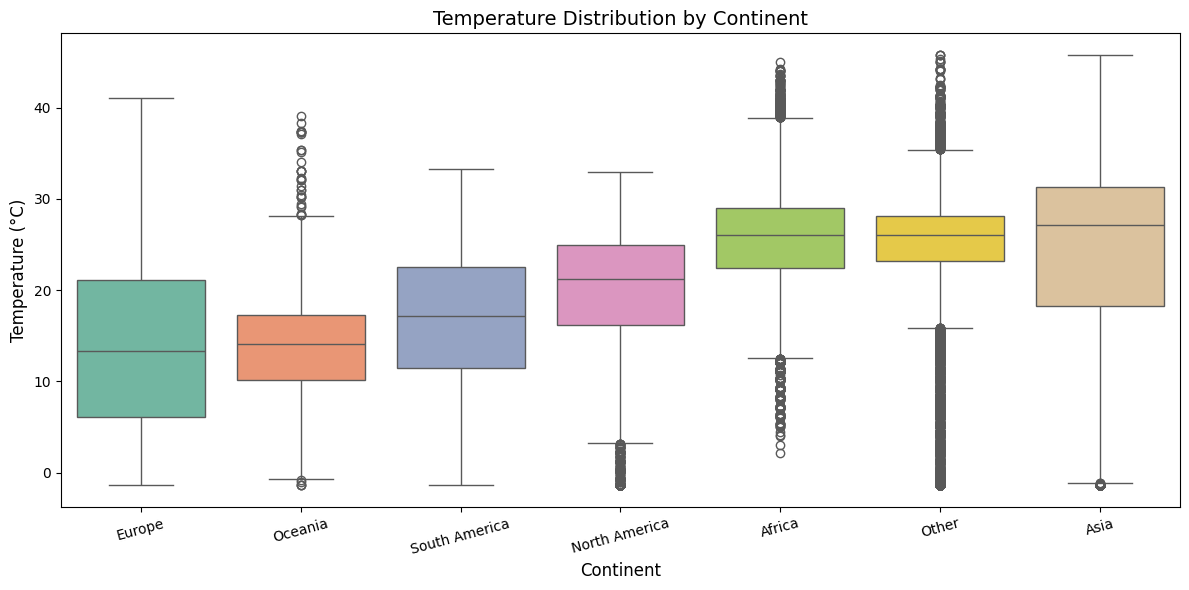

In [82]:
# Order continents by median temperature
continent_order = df.groupby('continent')['temperature_celsius'].median().sort_values().index

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='continent', y='temperature_celsius',
            order=continent_order, palette='Set2', ax=ax)
ax.set_title('Temperature Distribution by Continent', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Temperature (\u00b0C)', fontsize=12)
ax.tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.savefig('../outputs/figures/geo_temp_by_continent.png', dpi=150, bbox_inches='tight')
plt.show()

### 6.2 Latitude vs Temperature

I plot the relationship between latitude and temperature across all observations. A quadratic regression line is fitted because the relationship is non-linear: temperatures peak near the equator and decrease toward both poles.

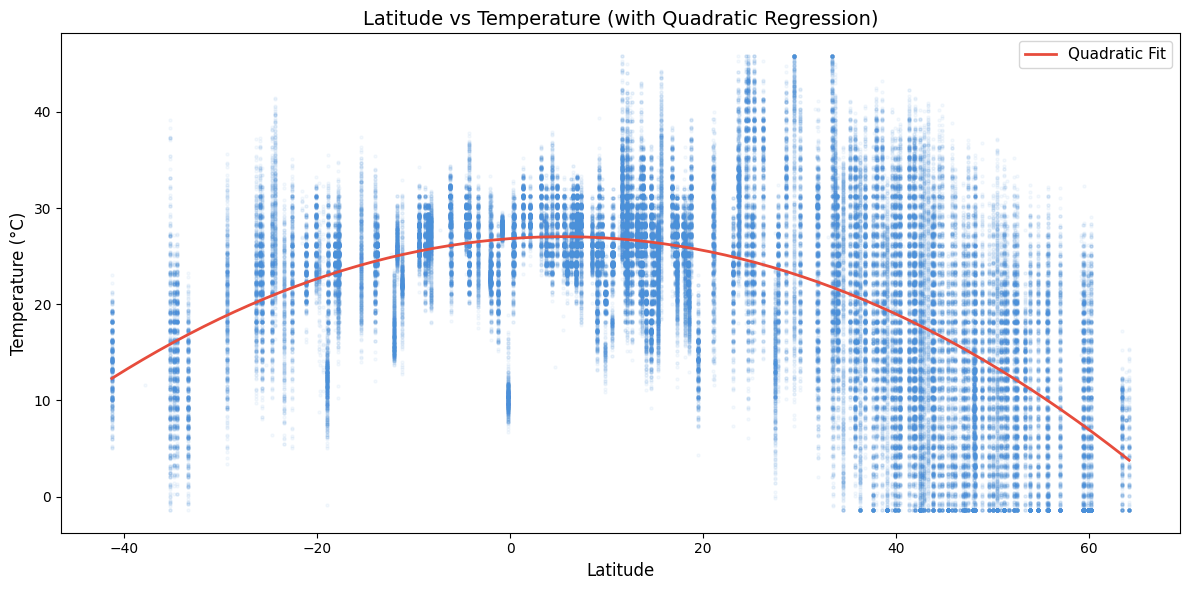

Quadratic fit: y = -0.0067x² + 0.0735x + 26.8201


In [83]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['latitude'], df['temperature_celsius'], alpha=0.05, s=5, color='#4A90D9')

# Quadratic regression line
z = np.polyfit(df['latitude'], df['temperature_celsius'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['latitude'].min(), df['latitude'].max(), 200)
ax.plot(x_line, p(x_line), color='#E74C3C', linewidth=2, label='Quadratic Fit')

ax.set_title('Latitude vs Temperature (with Quadratic Regression)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Temperature (\u00b0C)', fontsize=12)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('../outputs/figures/geo_latitude_temp.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Quadratic fit: y = {z[0]:.4f}x\u00b2 + {z[1]:.4f}x + {z[2]:.4f}')

The quadratic regression line captures the well-known relationship between latitude and temperature. Temperatures are highest near the equator (latitude 0) and decrease toward both poles. The quadratic fit is more appropriate than a linear fit because the relationship is symmetric around the equator. The scatter also shows considerable spread at each latitude, reflecting local factors such as altitude, ocean proximity, season, and time of day.

### 6.3 Weather Conditions by Continent

I examine the distribution of the top 10 most common weather conditions across continents using a stacked bar chart. This reveals how weather patterns differ between regions.

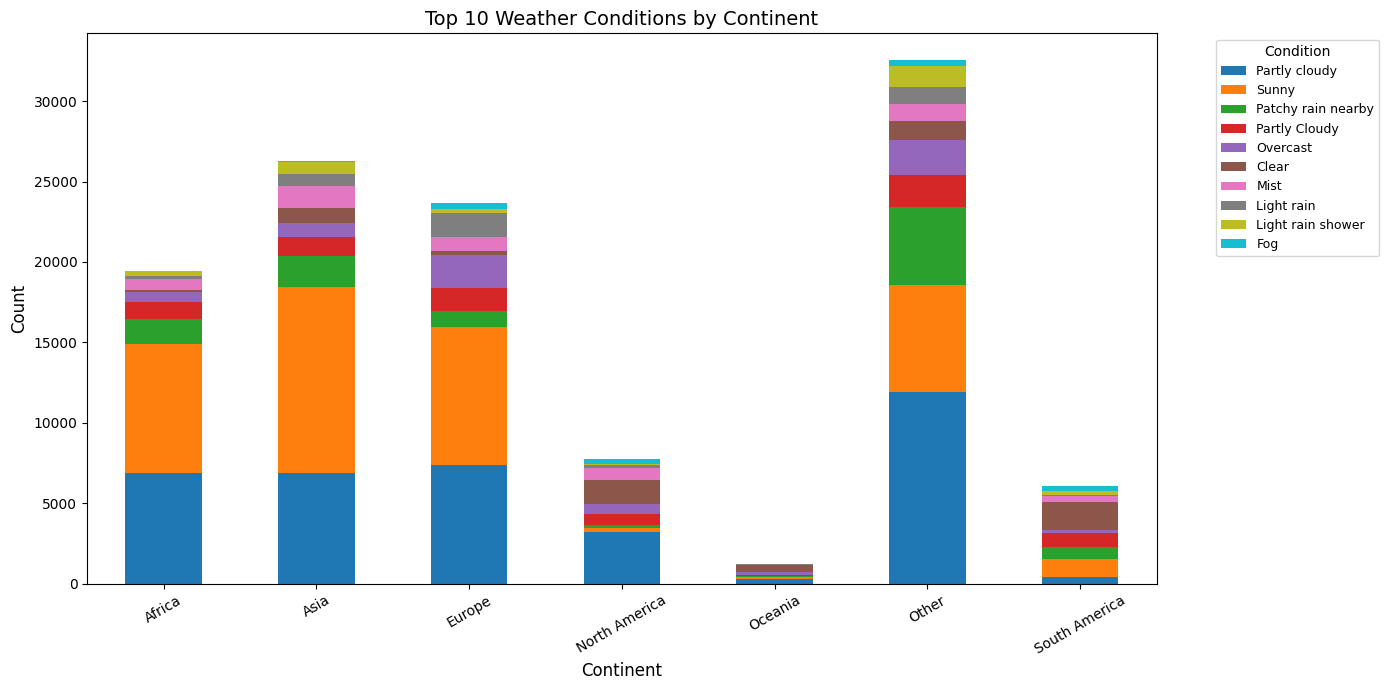

In [84]:
# Top 10 most common weather conditions globally
top_10_conditions = df['condition_text'].value_counts().head(10).index.tolist()
filtered = df[df['condition_text'].isin(top_10_conditions)]

# Count per continent and condition
condition_counts = filtered.groupby(
    ['continent', 'condition_text']
).size().unstack(fill_value=0)

# Reorder columns by global frequency
condition_counts = condition_counts[top_10_conditions]

fig, ax = plt.subplots(figsize=(14, 7))
condition_counts.plot(kind='bar', stacked=True, colormap='tab10', ax=ax)
ax.set_title('Top 10 Weather Conditions by Continent', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.savefig('../outputs/figures/geo_conditions_continent.png', dpi=150, bbox_inches='tight')
plt.show()

The stacked bar chart reveals distinct weather patterns across continents. Asia and Africa tend to have more sunny and clear conditions, reflecting their large tropical and arid zones. Europe shows a higher proportion of overcast and cloudy days, consistent with its temperate maritime climate. The distribution reflects the diverse climates within each continent, from tropical to temperate to polar regions. Continents with more countries in the dataset (such as Africa and Europe) naturally show higher total counts.

## 7. Conclusions

### Climate Analysis
- Temperature trends by continent confirm strong seasonal cycles, especially in the Northern Hemisphere (Europe, Asia, North America).
- The Northern Hemisphere shows a much stronger seasonal swing than the Southern Hemisphere, primarily because the Southern Hemisphere is roughly 80% ocean, which buffers temperature changes.
- Countries with the highest temperature variability are located at mid-to-high latitudes with continental climates (large seasonal temperature swings).

### Air Quality Insights
- Humidity is the strongest weather factor affecting air quality. Ozone correlates negatively with humidity (-0.42), and PM2.5/PM10 also decrease with higher humidity.
- Ozone has a moderate positive correlation with temperature (0.28), consistent with heat-driven photochemical reactions.
- Wind speed shows weaker correlations with most pollutants than expected, suggesting that at a global scale, humidity matters more than wind for air quality.
- PM2.5 pollution hotspots are concentrated in South Asia and parts of Africa/Middle East, driven by industrial activity, vehicle emissions, and agricultural burning.

### Geographical Patterns
- Temperature strongly correlates with latitude, following a quadratic pattern that peaks near the equator.
- Africa has the highest median temperature across continents, while Northern Hemisphere continents show the widest seasonal spreads.
- Weather condition distributions vary by continent, with tropical regions favoring clear and sunny conditions and temperate regions seeing more overcast and rainy conditions.

### Project Summary
1. **Data Cleaning** (`01_data_cleaning.ipynb`): Cleaned 124,721 records across 34 features, handled missing values, removed duplicate unit columns, and capped outliers.
2. **Exploratory Data Analysis** (`02_eda.ipynb`): Explored distributions, trends, and correlations. Detected anomalies using Isolation Forest and Z-score methods.
3. **Forecasting** (`03_forecasting.ipynb`): Built and compared 5 forecasting models (Linear Regression, Random Forest, XGBoost/GradientBoosting, SARIMA, Prophet/SARIMA Variant). Created an ensemble model and analyzed feature importance using 3 methods.
4. **Advanced Analysis** (`04_advanced_analysis.ipynb`): Conducted climate analysis by continent and hemisphere, examined air quality correlations with weather, built interactive spatial maps, and analyzed geographical patterns.

Together, these four notebooks provide a comprehensive data science analysis of global weather patterns, covering data preparation, exploratory analysis, predictive modeling, and advanced geographical and environmental insights.